## Overlaid PSD

In [7]:
import xarray
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import scipy
import dask

In [8]:
#some models

models_grid_refinement = [
    {
        "name" : "64_8_150_seconds_inner_1",
        "kill_factor" : 1,
        "legend" : "64x8",
        "plot_style" : "--b"
    },
    
    {
        "name" : "256x64_150_seconds_inner_1",
        "kill_factor" : 1,
        "legend" : "256x64",
        "plot_style" : "--k"
    },
    
    {
        "name" : "1080x256_150_seconds_inner_1",
        "kill_factor" : 1,
        "legend" : "1080x256",
        "plot_style" : "--g"
    }
    
]

In [ ]:
# pairs of same inner and outer steps changing the grid from fine to coarse

models = [
    {
        "name" : "inner_10_outer_1000_256x64",
        "kill_factor" : 1,
        "legend" : "256x64 (10,1000)",
        "plot_style" : "--c"
    },
    
    {
        "name" : "inner_10_outer_1000",
        "kill_factor" : 1,
        "legend" : "1080x256 (10,1000)",
        "plot_style" : "-c"
    },
    
        {
        "name" : "inner_1_outer_1000_256x64",
        "kill_factor" : 1,
        "legend" : "256x64 (1,1000)",
        "plot_style" : "--k"
    },
    
    {
        "name" : "inner_1_outer_1000",
        "kill_factor" : 1,
        "legend" : "1080x256 (1,1000)",
        "plot_style" : "-k"
    },
    {
        "name" : "inner10_outer_10_000",
        "kill_factor" : 0.61,
        "legend" : "256x64 (1,10000)",
        "plot_style" : "--b"
        
    }
    
]

In [29]:
def calculating(models):
    psd_data = []



    for model in models:
        model_name = model["name"]
        kill_factor = model["kill_factor"]
        label = model["legend"]
        plot_style = model["plot_style"]


        ds = xarray.open_dataset(f'./datasets/'+ model_name +'.nc', chunks={'time': '100MB'})
        ds = ds.isel(sample=0)
        outer_steps = len(ds.time)
        total_sim_time = max(ds.time.values)*kill_factor

        def vel_at_middle_of_channel(ds, ySize,xSize):
            return ds.isel(x= int(np.floor(xSize/3))).isel(y= int(np.floor(ySize/3)))

        ySize = len(ds.y.values)
        xSize = len(ds.x.values)

        du = ds.u
        u = du.pipe(vel_at_middle_of_channel,ySize,xSize)
        dv = ds.v
        v = dv.pipe(vel_at_middle_of_channel,ySize,xSize)

        if kill_factor != 1:
            u = u[:int(kill_factor*outer_steps)]
            v = v[:int(kill_factor*outer_steps)]

    #     ek = np.sqrt((u**2 + v**2))
    #     f, Pxx_den = scipy.signal.welch(ek,(outer_steps/total_sim_time))
        f, Pxx_den = scipy.signal.welch(v,(outer_steps/total_sim_time))

        this_sim_psd_data = [f,Pxx_den,label,plot_style]

        psd_data.append(this_sim_psd_data)

    return psd_data

In [30]:
def plotting(psd_data):
    for data in psd_data:

        plt.loglog(data[0], data[1], data[3], label=data[2])

    x = np.array([0,1]).astype(float)
    y = np.array([-2,-2  -3   ]).astype(float) #inertial gradient we are looking for in 2d turbulence is -3
    
    plt.plot(10**x,10**y,"-r")
    plt.text(3*10**0,10**-3,"k=-3 slope", fontsize=9)
    
    plt.legend(loc="lower left")
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.show()

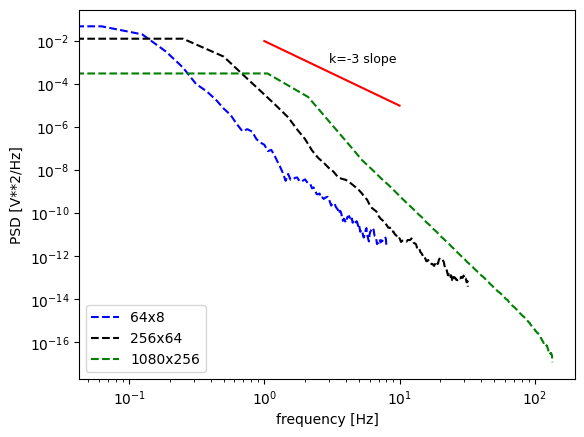

In [31]:
# grid refinement

# ran each for 150 seconds of simulation time

plotting(calculating(models_grid_refinement))

In [32]:
models_increasing_outer_steps_1080 = [
    {
        "name" : "1080x256_inner_1_outer_1000",
        "kill_factor" : 1,
        "legend" : "1000",
        "plot_style" : "--b"
        
    },
    {
        "name" : "1080x256_inner_1_outer_5000",
        "kill_factor" : 1,
        "legend" : "5 000",
        "plot_style" : "--g"
        
    },
    {
        "name" : "1080x256_inner_1_outer_10000",
        "kill_factor" : 1,
        "legend" : "10 000",
        "plot_style" : "--k"
        
    },
    {
        "name" : "1080x256_inner_1_outer_20000",
        "kill_factor" : 1,
        "legend" : "20 000",
        "plot_style" : "--c"
        
    }
]

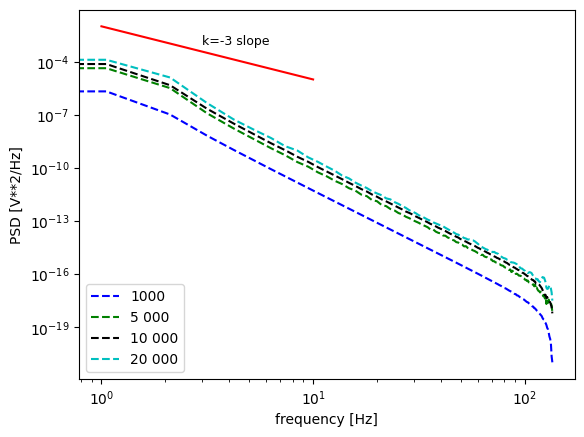

In [33]:
# same grids (1080x256), longer simulations

plotting(calculating(models_increasing_outer_steps_1080))

In [34]:
models_increasing_outer_steps_256 = [
    {
        "name" : "256x64_inner_1_outer_1000",
        "kill_factor" : 1,
        "legend" : "1000",
        "plot_style" : "--b"
        
    },
    {
        "name" : "256x64_inner_1_outer_5000",
        "kill_factor" : 1,
        "legend" : "5 000",
        "plot_style" : "--g"
        
    },
    {
        "name" : "256x64_inner_1_outer_10000",
        "kill_factor" : 1,
        "legend" : "10 000",
        "plot_style" : "--k"
        
    },
    {
        "name" : "256x64_inner_1_outer_20000",
        "kill_factor" : 1,
        "legend" : "20 000",
        "plot_style" : "--c"
        
    },
    {
        "name" : "256x64_inner_1_outer_50000",
        "kill_factor" : 1,
        "legend" : "50 000",
        "plot_style" : "--r"
        
    }
]

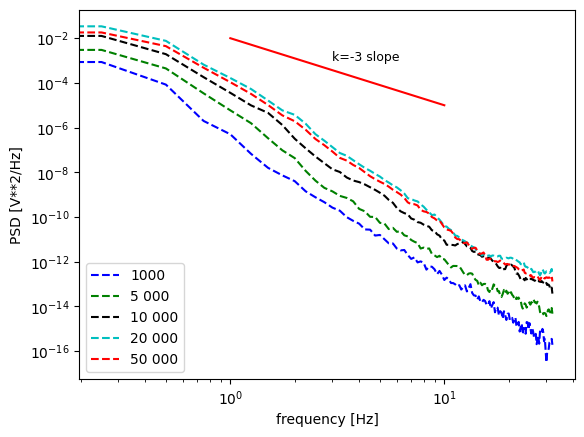

In [35]:
# same grids (256x64), longer simulations

plotting(calculating(models_increasing_outer_steps_256))